# Exploratory analysis

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

In [5]:
train = pd.read_csv("Files/data_train.csv")

In [5]:
train.describe()

,Unnamed: 0,seq_id,SeqLength,A,R,N,D,C,E,Q,...,MoreauBrotoAuto_Mutability23,MoreauBrotoAuto_Mutability24,MoreauBrotoAuto_Mutability25,MoreauBrotoAuto_Mutability26,MoreauBrotoAuto_Mutability27,MoreauBrotoAuto_Mutability28,MoreauBrotoAuto_Mutability29,MoreauBrotoAuto_Mutability30,pH,tm
count,28696.000000,28696.000000,28696.000000,28696.000000,28696.000000,28696.000000,28696.000000,28696.000000,28696.000000,28696.000000,...,28696.000000,28696.000000,28696.000000,28696.000000,28696.000000,28696.000000,28696.000000,28696.000000,28696.000000,28696.000000
mean,14347.500000,16805.942257,450.583775,7.933964,5.422100,4.263457,5.527051,1.460943,7.105625,4.064779,...,0.021212,0.020981,0.020948,0.021123,0.020842,0.021070,0.020869,0.021026,6.852437,49.079321
std,8283.965999,8351.341517,660.478906,2.826397,2.264102,1.838423,1.772346,1.322568,2.513279,1.888433,...,0.067654,0.069089,0.068423,0.068465,0.069619,0.069951,0.070658,0.070678,1.168815,14.210971
min,0.000000,25.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.959000,-2.066000,-1.015000,-0.362000,-0.355000,-0.366000,-0.382000,-0.399000,1.990000,-1.000000
25%,7173.750000,9589.750000,195.000000,5.938000,3.950750,3.061000,4.361000,0.637000,5.556000,2.932000,...,-0.020000,-0.020000,-0.020000,-0.021000,-0.021000,-0.021000,-0.021000,-0.021000,7.000000,41.900000
50%,14347.500000,16767.500000,335.000000,7.692000,5.205000,4.110000,5.429000,1.220000,6.923000,3.823000,...,0.019000,0.019000,0.019000,0.019000,0.019000,0.019000,0.019000,0.019000,7.000000,48.000000
75%,21521.250000,24006.250000,526.000000,9.494000,6.627000,5.263000,6.473000,1.935000,8.451000,5.000000,...,0.062000,0.062000,0.062000,0.062000,0.061000,0.061000,0.061000,0.061000,7.000000,53.800000
max,28695.000000,31389.000000,32767.000000,29.866000,24.540000,31.990000,20.530000,16.071000,24.658000,24.346000,...,0.644000,0.641000,0.638000,0.700000,0.638000,0.593000,0.879000,0.855000,64.900000,130.000000


Após observar a descrição da coluna do pH, observamos que o valor máximo é 64.9, que não é um valor aceitável de pH (valor máximo de 14).

Devido a tal discrepância, procurou-se todas as ocorrências onde o valor do pH é superior a 14, eliminando as respetivas linhas:

In [6]:
train = train[(train["pH"]<14) & (train["pH"]>0)]
#train.describe()

Observamos que foram eliminadas 7 linhas (passou de 28696 para 28689).

In [7]:
# split X and y
X_train = train.iloc[:,2:-1] #Remove sequence id from the X dataset
y_train = train["tm"]

In [8]:
X_train.head()

,SeqLength,A,R,N,D,C,E,Q,G,H,...,MoreauBrotoAuto_Mutability22,MoreauBrotoAuto_Mutability23,MoreauBrotoAuto_Mutability24,MoreauBrotoAuto_Mutability25,MoreauBrotoAuto_Mutability26,MoreauBrotoAuto_Mutability27,MoreauBrotoAuto_Mutability28,MoreauBrotoAuto_Mutability29,MoreauBrotoAuto_Mutability30,pH
0,501,10.379,4.192,4.591,5.589,0.000,6.387,5.389,4.990,1.996,...,-0.060,-0.058,-0.057,-0.058,-0.056,-0.056,-0.056,-0.056,-0.057,7.0
1,313,7.987,7.668,4.473,3.834,2.236,7.029,3.834,9.904,2.236,...,0.020,0.019,0.017,0.014,0.017,0.014,0.012,0.013,0.010,7.0
2,109,7.339,3.670,1.835,6.422,1.835,9.174,2.752,8.257,1.835,...,0.086,0.087,0.079,0.068,0.051,0.065,0.059,0.050,0.048,7.0
3,329,7.295,3.343,6.991,7.599,0.304,6.079,3.343,8.815,2.128,...,0.079,0.074,0.077,0.074,0.073,0.074,0.078,0.081,0.082,5.5
4,278,10.432,7.554,2.878,2.158,0.719,8.273,15.108,5.396,1.439,...,0.063,0.057,0.051,0.053,0.052,0.050,0.050,0.051,0.049,7.0


#### Outlier treatment (dependent variable)

Realizou-se a verificação dos outliers para a variável dependente ("tm"), definindo os mesmos como valores cujo valor absoluto é 3 vezes superior ao desvio padrão. Os outliers encontrados foram, então, removidos do dataset. No total, foram removidos 286 exemplos do dataset (passou de 28689 para 28403).

In [8]:
from scipy import stats

X_train = X_train[(np.abs(stats.zscore(y_train)) < 3)]
y_train = y_train[(np.abs(stats.zscore(y_train)) < 3)]

In [10]:
X_train

,SeqLength,A,R,N,D,C,E,Q,G,H,...,MoreauBrotoAuto_Mutability22,MoreauBrotoAuto_Mutability23,MoreauBrotoAuto_Mutability24,MoreauBrotoAuto_Mutability25,MoreauBrotoAuto_Mutability26,MoreauBrotoAuto_Mutability27,MoreauBrotoAuto_Mutability28,MoreauBrotoAuto_Mutability29,MoreauBrotoAuto_Mutability30,pH
0,501,10.379,4.192,4.591,5.589,0.000,6.387,5.389,4.990,1.996,...,-0.060,-0.058,-0.057,-0.058,-0.056,-0.056,-0.056,-0.056,-0.057,7.0
1,313,7.987,7.668,4.473,3.834,2.236,7.029,3.834,9.904,2.236,...,0.020,0.019,0.017,0.014,0.017,0.014,0.012,0.013,0.010,7.0
2,109,7.339,3.670,1.835,6.422,1.835,9.174,2.752,8.257,1.835,...,0.086,0.087,0.079,0.068,0.051,0.065,0.059,0.050,0.048,7.0
3,329,7.295,3.343,6.991,7.599,0.304,6.079,3.343,8.815,2.128,...,0.079,0.074,0.077,0.074,0.073,0.074,0.078,0.081,0.082,5.5
4,278,10.432,7.554,2.878,2.158,0.719,8.273,15.108,5.396,1.439,...,0.063,0.057,0.051,0.053,0.052,0.050,0.050,0.051,0.049,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28691,549,6.011,7.650,4.372,6.922,2.186,5.647,4.372,9.290,2.732,...,-0.005,-0.006,-0.004,-0.003,-0.002,-0.003,-0.002,-0.002,-0.005,7.0
28692,469,7.889,5.330,4.051,4.478,1.066,6.183,3.412,5.757,4.691,...,-0.047,-0.049,-0.048,-0.048,-0.048,-0.048,-0.046,-0.044,-0.046,7.0
28693,128,10.156,2.344,3.906,5.469,0.781,5.469,6.250,8.594,1.562,...,0.104,0.098,0.097,0.100,0.115,0.099,0.107,0.102,0.097,7.0
28694,593,7.926,4.216,4.216,5.734,0.843,6.071,2.024,8.769,1.855,...,0.028,0.030,0.029,0.029,0.030,0.030,0.030,0.030,0.031,7.0


#### Standardization (MinMaxScaler and StandardScaler)

Realizou-se a standardização dos dados através de uma instância da classe **MinMaxScaler** e da função **scale** presentes na biblioteca **sklearn** (módulo **preprocessing**). A primeira foi utilizada para efetuar a standardização dos dados que irão alimentar os modelos de aprendizagem supervisionada (uma primeira tentativa com a função **scale** gerou resultados menos satisfatórios nesta tarefa), e a segunda será exclusivamente empregue para a standardização dos dados a utilizar nos métodos de aprendizagem não-supervisionada.

In [9]:
from sklearn import preprocessing

# Para utilização nos modelos de aprendizagem supervisionada
scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train_arr = scaler.transform(X_train)
X_train_sc = pd.DataFrame(data=X_train_arr, columns=X_train.columns)

# Apenas para aplicar o PCA (remoção de outliers nos dados das variáveis independentes)
X_train_sc_z = pd.DataFrame(data=preprocessing.scale(X_train), columns=X_train.columns)

In [16]:
X_train_sc.head()

,SeqLength,A,R,N,D,C,E,Q,G,H,...,MoreauBrotoAuto_Mutability22,MoreauBrotoAuto_Mutability23,MoreauBrotoAuto_Mutability24,MoreauBrotoAuto_Mutability25,MoreauBrotoAuto_Mutability26,MoreauBrotoAuto_Mutability27,MoreauBrotoAuto_Mutability28,MoreauBrotoAuto_Mutability29,MoreauBrotoAuto_Mutability30,pH
0,0.015139,0.347519,0.170823,0.143514,0.272236,0.000000,0.259023,0.221351,0.081911,0.136395,...,0.538762,0.562071,0.742150,0.578947,0.288136,0.301108,0.323253,0.258525,0.272727,0.556049
1,0.009401,0.267428,0.312469,0.139825,0.186751,0.139133,0.285060,0.157480,0.162574,0.152795,...,0.590879,0.610106,0.769487,0.622505,0.356874,0.371601,0.394161,0.313243,0.326156,0.556049
2,0.003174,0.245731,0.149552,0.057362,0.312811,0.114181,0.372050,0.113037,0.135538,0.125393,...,0.633876,0.652527,0.792390,0.655172,0.388889,0.422961,0.443170,0.342585,0.356459,0.556049
3,0.009890,0.244258,0.136227,0.218537,0.370141,0.018916,0.246533,0.137312,0.144698,0.145415,...,0.629316,0.644417,0.791651,0.658802,0.409605,0.432024,0.462982,0.367169,0.383573,0.389567
4,0.008333,0.349294,0.307824,0.089966,0.105114,0.044739,0.335510,0.620554,0.088575,0.098333,...,0.618893,0.633812,0.782047,0.646098,0.389831,0.407855,0.433785,0.343378,0.357257,0.556049


In [17]:
X_train_sc_z.head()

,SeqLength,A,R,N,D,C,E,Q,G,H,...,MoreauBrotoAuto_Mutability22,MoreauBrotoAuto_Mutability23,MoreauBrotoAuto_Mutability24,MoreauBrotoAuto_Mutability25,MoreauBrotoAuto_Mutability26,MoreauBrotoAuto_Mutability27,MoreauBrotoAuto_Mutability28,MoreauBrotoAuto_Mutability29,MoreauBrotoAuto_Mutability30,pH
0,0.073179,0.884308,-0.540551,0.166229,0.028724,-1.113421,-0.280073,0.692977,-0.764141,-0.144585,...,-1.198806,-1.178724,-1.136078,-1.161830,-1.134499,-1.111612,-1.110298,-1.095428,-1.111168,0.178177
1,-0.210196,0.031288,1.007495,0.101659,-0.964606,0.580559,-0.024101,-0.131609,1.167583,0.065466,...,-0.021403,-0.038921,-0.063606,-0.107821,-0.066506,-0.104390,-0.136385,-0.117148,-0.161443,0.178177
2,-0.517688,-0.199798,-0.773025,-1.341856,0.500202,0.276763,0.831132,-0.705373,0.520137,-0.285494,...,0.949954,0.967659,0.834952,0.682685,0.430915,0.629443,0.536761,0.407436,0.377208,0.178177
3,-0.186079,-0.215489,-0.918656,1.479510,1.166384,-0.883113,-0.402876,-0.391977,0.739490,-0.029057,...,0.846931,0.775225,0.805967,0.770519,0.752776,0.758942,0.808884,0.846953,0.859158,-1.506388
4,-0.262952,0.903208,0.956725,-0.771125,-1.913223,-0.568711,0.471894,5.846773,-0.604540,-0.632079,...,0.611450,0.523580,0.429152,0.463100,0.445545,0.413609,0.407861,0.421614,0.391383,0.178177


#### Descriptive statistics

Efetuámos uma análise descritiva das variáveis bastante convencional, em que calculámos, para cada variável preditiva, a **média**, o **desvio-padrão**, o **mínimo**, o **máximo**, e os **quartis 25%, 50% e 75%**. Uma análise visual dos dados não é viável visto que o número de features é bastante elevado. A mesma análise foi relaizada para a variável alvo.

In [36]:
X_stats = X_train_sc.describe()
X_stats

,SeqLength,A,R,N,D,C,E,Q,G,H,...,MoreauBrotoAuto_Mutability22,MoreauBrotoAuto_Mutability23,MoreauBrotoAuto_Mutability24,MoreauBrotoAuto_Mutability25,MoreauBrotoAuto_Mutability26,MoreauBrotoAuto_Mutability27,MoreauBrotoAuto_Mutability28,MoreauBrotoAuto_Mutability29,MoreauBrotoAuto_Mutability30,pH
count,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,...,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000
mean,0.013658,0.264490,0.220284,0.134017,0.269764,0.091449,0.287511,0.167674,0.113819,0.147683,...,0.591827,0.611746,0.771108,0.626960,0.361154,0.378907,0.404090,0.319796,0.335239,0.538440
std,0.020250,0.093893,0.091502,0.057128,0.086060,0.082135,0.101717,0.077459,0.041758,0.078078,...,0.044265,0.042144,0.025490,0.041326,0.064363,0.069989,0.072808,0.055934,0.056258,0.098829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.005830,0.198252,0.160839,0.096186,0.213444,0.039886,0.225322,0.121437,0.087311,0.096112,...,0.564821,0.586400,0.755818,0.601936,0.321092,0.336354,0.359750,0.286281,0.301435,0.556049
50%,0.010103,0.256814,0.211573,0.129072,0.265075,0.075913,0.279950,0.157973,0.108831,0.142818,...,0.590879,0.610106,0.770225,0.625529,0.358757,0.377644,0.402503,0.318002,0.334131,0.556049
75%,0.015994,0.315476,0.268786,0.165098,0.315636,0.120403,0.341451,0.206071,0.136244,0.192497,...,0.618241,0.636931,0.786110,0.651543,0.400188,0.418933,0.446298,0.351308,0.366826,0.556049
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
y_stats = y_train.describe()
y_stats

count    28689.000000
mean        49.091216
std         14.192283
min         -1.000000
25%         41.900000
50%         48.000000
75%         53.800000
max        130.000000
Name: tm, dtype: float64

Para a variável alvo ("tm"), realizámos ainda uma análise gráfica, nomeadamente através de um **violin plot** e de um **histograma**. Ambas as representações gráficas apontam para que os dados apresentam uma distribuição normal, apesar de alguns picos em ambos as representações poderem refutar esta suposição.

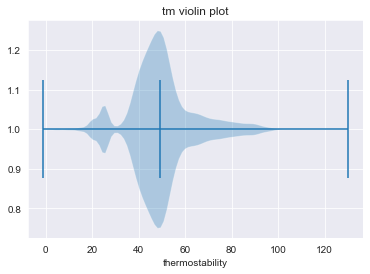

In [23]:
# violin plot (tm)
plt.violinplot(y_train, vert=False, widths=0.5, showmeans=True)
plt.title("tm violin plot") 
plt.xlabel("thermostability")
plt.show()
plt.close("all")

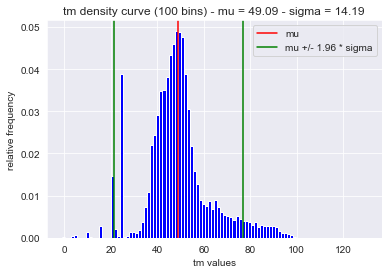

In [24]:
# density curve of label (tm)
bins = 100
plt.hist(y_train, color="b", bins=bins, density=True)
y_mean, y_std = y_stats['mean'], y_stats['std']
plt.axvline(y_mean, color="r", label="mu")
plt.axvline(y_mean-y_std*1.96, color="g", label="mu +/- 1.96 * sigma")
plt.axvline(y_mean+y_std*1.96, color="g")
plt.title(f"tm density curve ({bins} bins) - mu = {y_mean:.2f} - sigma = {y_std:.2f}")
plt.xlabel("tm values"), plt.ylabel("relative frequency")
plt.legend()
plt.show()
plt.close("all")

In [18]:
# Possível verificação de outliers para todas as variáveis independentes (features)

# !pip install outlier_utils

# from outliers import smirnov_grubbs as grubbs

# result = {}
# for col in X_train.columns:
#     result[col] = grubbs.two_sided_test_indices(np.array(X_train_sc[col]), alpha=0.05)

# print(result)

#### Correlations (with respect to the output variable)
De modo a perceber quais as relações entre as variáveis dependentes e a variável resposta, procedemos a uma análise de correlação por 4 métodos distintos: **1. correlação de Pearson**, **2. correlação de Spearman**, **3. ANOVA f-values**, **4. informação mútua**. Todas as correlações calculadas serão, ainda, utilizadas como método de seleção de features na aprendizagem não supervisionada (**UL.ipynb**), supervisionada (**SL.ipynb**) e no deep learning (**DL_MLP.ipynb**).

<b>k best correlations</b> (given an array of correlations)

Começámos por definir a função **get_k_best_corrs** de modo a conseguirmos determinar quais as variáveis com maior grau de correlação com a label. A função aceita um parâmetro **k**, que representa o número de features a serem selecionadas, e um parâmetro **corrs** correspondente a uma lista contendo as correlações. Retorna um dicionário contendo como keys o nome das **k** variáveis com maior correlação com a label, e as respetivas correlações como values.

In [10]:
# get k best scores between features and label -> pearson, spearman, f_regression and multi_info_regression
def get_k_best_corrs(k, scores):
    idxs = np.argsort(scores)[-k:]
    feats = X_train_sc.columns[idxs]
    scores = np.sort(scores)[-k:]
    return {f: c for f, c in zip(feats, scores)}

<b>Pearson and Spearman correlations</b>

A **correlação de Pearson** mede a relação linear entre duas variáveis, variando entre -1 e 1 dependendo do grau de correlação entre as mesmas. Caso a relação linear entre as variáveis seja forte, o valor absoluto da correlação é alto (próximo de -1 caso a relação seja negativa; próximo de 1 caso a relação seja positiva).<br>A **correlação de Spearman** é um método de correlação que, ao invés de medir relações lineares entre variáveis, compara a ordenação dos valores de ambas as variáveis. Tal como no caso anterior, varia entre -1 e 1. Caso a ordenação dos valores de ambas as variáveis seja semelhante, a correlação entre as mesmas é forte, ou seja, próxima de 1. Caso a ordenação dos valores seja aproximadamente inversa, então a correlação é, também, forte, mas próxima de -1. Finalmente, caso não haja qualquer relação entre as ordenações das variáveis, a correlação toma valores próximos de 0. Em detrimento da correlação de Pearson, permite averiguar relações não lineares entre variáveis (ver figura em baixo).

![title](Files/corrs.png)

In [11]:
# pearson correlations with respect to tm (label) -> measures linear correlations
def pearson_correlations(x: np.ndarray):
    return abs(scipy.stats.pearsonr(x, y_train)[0])

# spearman correlations with respect to tm (label) -> compares the ranks of data
def spearman_correlations(x: np.ndarray):
    return abs(scipy.stats.spearmanr(x, y_train).correlation)

In [12]:
pearson_corrs = np.apply_along_axis(pearson_correlations, axis=0, arr=X_train_sc)
spearman_corrs = np.apply_along_axis(spearman_correlations, axis=0, arr=X_train_sc)

In [19]:
# guardar correlações de Pearson e Spearman para análises futuras

with open("Files/pearson.txt", "w") as p:
    for elem in pearson_corrs:
        p.write(f"{elem}\n")

with open("Files/spearman.txt", "w") as s:
    for elem in spearman_corrs:
        s.write(f"{elem}\n")

In [13]:
# highest 100 pearson correlations
best_pearson = get_k_best_corrs(100, pearson_corrs)
best_pearson

{'DKY': 0.15266814153133518,
 'GQ': 0.15286365153343026,
 'EAQ': 0.15289552301813222,
 'AV': 0.15344493003827891,
 'FAT': 0.15350338513524256,
 'KKM': 0.15442712483828158,
 'AKK': 0.15442951930601523,
 'QT': 0.1546754948448122,
 'KLM': 0.15506147575685586,
 'KPN': 0.15614679682260235,
 'SCL': 0.15649190277972555,
 'GQR': 0.15682237066803156,
 'RTD': 0.15697681444754621,
 'LHK': 0.157142284572514,
 'LVM': 0.15716188338196335,
 'QHL': 0.1572030391749388,
 'KL': 0.15829185569280568,
 'YAD': 0.1584168666638824,
 'GKM': 0.15856469543391877,
 'SKG': 0.15859564646039082,
 'ADG': 0.1587400200194572,
 'HK': 0.15963941435489323,
 'GDT': 0.16125895341758134,
 'TK': 0.1613779793990864,
 'GVN': 0.16198659215162237,
 'FDK': 0.16301496580571873,
 'KM': 0.16308080977110492,
 'THE': 0.16358028851350914,
 'NAD': 0.16516995458724865,
 'YIY': 0.1653405413090765,
 'MVN': 0.16567866339095877,
 'CM': 0.16576213874417398,
 'RQG': 0.16612259484366063,
 'NNT': 0.1662320325215987,
 '_SolventAccessibilityD2025': 

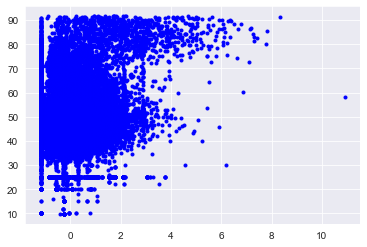

In [40]:
# highest correlation (pearson) -> 'AL'
plt.plot(X_train_sc["AL"], y_train, "b.")

In [14]:
# highest 100 spearman correlations
best_spearman = get_k_best_corrs(100, spearman_corrs)
best_spearman

{'GQR': 0.12962660212067384,
 'ETK': 0.13004809789779256,
 'KRF': 0.1303176805773361,
 'GKM': 0.1303421571404401,
 'LVM': 0.13047556331329602,
 'ADG': 0.13071474455829585,
 'RQG': 0.13098661870594847,
 'TS': 0.13121349362229823,
 'SAN': 0.13125223264214886,
 'NRS': 0.13182856454436126,
 'RTD': 0.13192560905438364,
 'GDT': 0.13196690532358818,
 'VSI': 0.13206023662371805,
 'HK': 0.13212793065896916,
 'YIY': 0.13272219915855835,
 'R': 0.13272362653837938,
 'MVN': 0.13277013284658468,
 'ST': 0.13342347819268413,
 'QT': 0.13358051373961205,
 'EFD': 0.13370615927206225,
 'KLM': 0.13372278039552202,
 'TLI': 0.13403988547059595,
 'STK': 0.13420492753514432,
 'EDN': 0.13447137015118002,
 'KM': 0.13480177065334706,
 'FAT': 0.13537791704118815,
 'RA': 0.13581753888988382,
 'DKG': 0.13605421762315262,
 'THE': 0.1361808260910424,
 'YKP': 0.13641926459247944,
 'KKM': 0.1365192400190705,
 'GQP': 0.13662112389017164,
 'TKK': 0.13698864077372286,
 'KPN': 0.1371519884529183,
 'CLV': 0.13719551451934017

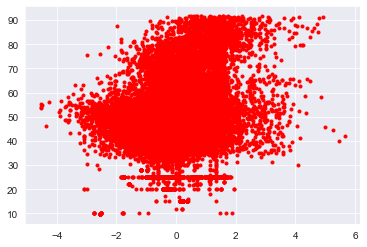

In [43]:
# highest correlation (spearman) -> '_SolventAccessibilityC1'
plt.plot(X_train_sc["_SolventAccessibilityC1"], y_train, "r.")

<b>Univariate linear regression</b> (F-statistic)

Os **ANOVA f-values** permitem, tal como a correlação de Pearson, averiguar relações lineares entre duas variáveis. Devolve valores de correlação iguais aos obtidos através da correlação de Pearson caso todas as variáveis independentes apresentem uma relação positiva com a label.

In [3]:
from sklearn.feature_selection import f_regression

In [15]:
# highest 100 f-values
f_values, _ = f_regression(X_train_sc, y_train)
best_f_scores = get_k_best_corrs(100, f_values)
best_f_scores

[ 113.74790523  420.38668619 1259.59667485 ...  139.13083511  149.40792551
   87.91197365]


{'DKY': 677.7548655886151,
 'GQ': 679.5334313693767,
 'EAQ': 679.8236045240703,
 'AV': 684.8360905787098,
 'FAT': 685.3705627438148,
 'KKM': 693.8462378127172,
 'AKK': 693.868280511569,
 'QT': 696.1346512690616,
 'KLM': 699.6989893213982,
 'KPN': 709.7737074147782,
 'SCL': 712.9934198698834,
 'GQR': 716.0838965508586,
 'RTD': 717.530688006666,
 'LHK': 719.0825116491569,
 'LVM': 719.2664338454196,
 'QHL': 719.65273666001,
 'KL': 729.913238679588,
 'YAD': 731.0962812094432,
 'GKM': 732.4965895679909,
 'SKG': 732.7899556485584,
 'ADG': 734.1592199896194,
 'HK': 742.7202083706278,
 'GDT': 758.2708012596833,
 'TK': 759.4205227833365,
 'GVN': 765.3140484966805,
 'FDK': 775.3282179645197,
 'KM': 775.9717917863237,
 'THE': 780.8632013504014,
 'NAD': 796.5414539573109,
 'YIY': 798.2338990504911,
 'MVN': 801.5942604308842,
 'CM': 802.4250400403686,
 'RQG': 806.0177902826666,
 'NNT': 807.1103008408148,
 '_SolventAccessibilityD2025': 808.583932196203,
 '_HydrophobicityD1025': 808.583932196203,
 'D

In [21]:
# guardar ANOVA f-values para análises futuras

with open("Files/f_values.txt", "w") as f:
    for elem in f_values:
        f.write(f"{elem}\n")

In [30]:
# check if pearson_corrs and f_values are equal
(pearson_corrs == f_values).all()

False

<b>Mutual information regression</b> (MI)

A **informação mútua** mede o grau de dependência entre duas variáveis, quantificando a informação que se pode obter acerca de uma variável a partir da outra. É igual a 0 caso as duas variáveis sejam independentes, e, quanto mais elevado for o valor de informação mútua entre variáveis, maior é a sua dependência, e por consequência, maior a sua correlação.

In [22]:
from sklearn.feature_selection import mutual_info_regression as m_info

In [ ]:
# highest 100 mi's (by default, n_neighbors=3 -> explore)
mutual_info = m_info(X_train_sc, y_train)
best_mis = get_k_best_corrs(100, mutual_info)
best_mis

In [ ]:
# guardar informações mútuas para análises futuras

with open("Files/mutual_info.txt", "w") as m:
    for elem in mutual_info:
        m.write(f"{elem}\n")

Para que os datasets construídos acima possam ser utilizados em análises futuras (nomeadamente na aprendizagem não supervisionada, supervisionada e deep learning), foram guardados em ficheiros **csv**.

In [25]:
# Guardar resultados para serem utilizados nos outros notebooks

X_train_sc.to_csv("Files/X_train_sc.csv")
X_train_sc_z.to_csv("Files/X_train_sc_z.csv")

y_train.to_csv("Files/y_train.csv")

#### Correlations
(pairs of variables)

Um problema que pode ocorrer nos dados é a multicolinearidade, quando se observa correlações elevadas entre variáveis independentes. Isto pode fazer com que os resultados obtidos de análises de machine leraning, como na aplicação de regressões lineares, não sejam fidedígnos. **(explicar?)** Desta forma, deve-se remover uma das variáveis altamente correlacionadas, de preferência a que está menos correlacionada com a variável alvo.

Desta forma, criou-se uma função para averiguar a possibilidade de multicolinearidade (usando as correlações de pearson e spearman) e devolvendo os pares de variáveis com correlações elevadas. Na generalidade, considera-se uma correlação elevada quando se obtém um valor absoluto igual ou superior a 0.8.

Após ser analisado uma correlação elevada, compara-se cada variável independente com a dependente, de forma a averiguar qual é a que está menos correlacionada e, portanto, deve ser removida. A função devolve, assim, os pares de variáveis altamente correlacionados, e ainda qual a variável desse par que deverá ser removida.

In [23]:
# Create new training data based on the top 100 features (for both spearman and pearson)

X_train_SM = X_train_sc_z.loc[:,best_spearman.keys()]
X_train_PS = X_train_sc_z.loc[:,best_pearson.keys()]

In [128]:
X_train_SM.head()

,GQR,ETK,KRF,GKM,LVM,ADG,RQG,TS,SAN,NRS,...,IGM,_SolventAccessibilityT23,QPM,NIW,T,CMA,K,LMY,ICM,_SolventAccessibilityC1
0,-0.287743,-0.301368,-0.289975,-0.248041,-0.26803,1.817367,-0.300111,-0.921269,-0.315313,-0.279966,...,-0.248737,0.151038,-0.218189,-0.192412,0.309394,-0.193642,-0.378718,-0.226035,-0.185827,-0.107799
1,-0.287743,-0.301368,-0.289975,-0.248041,-0.26803,-0.335474,-0.300111,-0.073354,-0.315313,-0.279966,...,-0.248737,-0.458539,-0.218189,-0.192412,-0.678440,-0.193642,-1.029394,-0.226035,-0.185827,1.151108
2,-0.287743,-0.301368,-0.289975,-0.248041,-0.26803,-0.335474,-0.300111,-0.921269,-0.315313,-0.279966,...,-0.248737,-0.702369,-0.218189,-0.192412,-0.970259,-0.193642,0.950440,-0.226035,-0.185827,0.243955
3,-0.287743,-0.301368,-0.289975,-0.248041,-0.26803,-0.335474,-0.300111,-0.126348,-0.315313,-0.279966,...,-0.248737,-0.214708,-0.218189,-0.192412,-0.065802,-0.193642,0.366500,-0.226035,-0.185827,-0.589146
4,-0.287743,-0.301368,-0.289975,-0.248041,-0.26803,-0.335474,-0.300111,0.032636,-0.315313,-0.279966,...,-0.248737,1.705457,-0.218189,-0.192412,1.810782,-0.193642,-0.450274,-0.226035,-0.185827,-1.644406


In [48]:
X_train_PS.head()

,DKY,GQ,EAQ,AV,FAT,KKM,AKK,QT,KLM,KPN,...,LMY,MAI,CMA,NIW,_SolventAccessibilityT23,_SolventAccessibilityC1,ICM,KGQ,AR,AL
0,-0.267463,-0.235935,-0.346617,0.824652,-0.283886,-0.269837,-0.391064,-0.760302,-0.280619,-0.252688,...,-0.225019,-0.241228,-0.192832,-0.191415,0.161105,-0.117881,-0.184867,-0.257779,0.009605,1.140561
1,-0.267463,0.743002,-0.346617,-0.989898,-0.283886,-0.269837,-0.391064,0.337159,-0.280619,-0.252688,...,-0.225019,-0.241228,-0.192832,-0.191415,-0.445497,1.130644,-0.184867,-0.257779,3.146741,-1.184397
2,-0.267463,-0.680907,-0.346617,-0.989898,-0.283886,-0.269837,-0.391064,2.429193,-0.280619,-0.252688,...,-0.225019,-0.241228,-0.192832,-0.191415,-0.688137,0.230972,-0.184867,-0.257779,-0.815957,0.166985
3,-0.267463,-0.680907,-0.346617,-0.445533,-0.283886,-0.269837,-0.391064,-0.760302,-0.280619,-0.252688,...,-0.225019,-0.241228,-0.192832,-0.191415,-0.202856,-0.595258,-0.184867,-0.257779,-0.815957,0.588383
4,-0.267463,-0.680907,-0.346617,-0.336660,-0.283886,-0.269837,-0.391064,4.178271,-0.280619,-0.252688,...,-0.225019,-0.241228,-0.192832,-0.191415,1.707939,-1.641816,-0.184867,-0.257779,-0.072951,-1.184397


In [23]:
# Function to determine the independent variables that are highly correlated with one another
# (they result in less reliable statistical inference)

def _check_xy_corr(y_data:pd.DataFrame, var1:str, var2:str):
    """
    Returns the name of the variable worse correlated to y
    """
    corr1 = y_data.loc[var1,:]
    corr2 = y_data.loc[var2,:]

    if corr1 < corr2:
        return var1
    else:
        return var2


def multicolinearity(x_data:pd.DataFrame, y_data:pd.DataFrame, perc:float=0.8, method="pearson") -> list:
    """
    Selects pair os variables with collinearity above a given threshold.

    Parameters
    ----------
    :param x_data: Dataframe with independent variables
    :param y_var: Indicates column index or name of the dependent variable. If non-existent, define this parameter as None.
    :param perc: Collinearity percentage threshold
    :param method: Method to determine correlation between variables ('pearson', 'kendall', 'spearman')
    """

    corr = x_data.corr(method=method.lower())
    result = []
    check = 1
    for l in corr:
        for ix,val in enumerate(corr[l][check:]):
            if val>=perc:
                var1, var2 = (l, corr.index[ix])
                if y_data:
                    least_corr = _check_xy_corr(y_data, var1, var2)
                    result.append(((var1, var2), least_corr))
                else:
                    result.append((var1, var2))
            check += 1
    return result

In [24]:
multicol_sm = multicolinearity(X_train_SM, y_train, perc=0.8, method="spearman")

for elem in multicol_sm:
    print(elem)
#Multicollinearity non-existent

In [25]:
multicol_ps = multicolinearity(X_train_PS, y_train, perc=0.8, method="pearson")

for elem in multicol_ps:
    print(elem)
#Multicollinearity non-existent

Em nenhum dos casos (considerando os 100 descritores mais relevantes pelo método de spearman e pearson) se observou multicolinearidade.

Caso tivesse sido observado, utilizaríamos o seguinte bloco de código para remover as variáveis menos correlacionadas com a variável dependente.

In [67]:
# Eliminate variables with multicollinearity

#pairs, least_corr = list(zip(*multicol))
#least_corr = set(least_corr)

#for elem in least_corr:
#    del X_train[elem]